## Exploring Protein Relationships Through ESM-2 Embeddings

Proteins are molecular machines with unique structures that determine their functions. ESM-2 treats protein sequences as a language, learning representations that capture evolutionary and functional relationships without relying on traditional sequence alignment.

In this notebook, we'll explore how ESM-2 embeddings reveal relationships between six human proteins:

**Oxygen Transport & Storage:**
- **Hemoglobin Beta**: The oxygen-carrying protein in red blood cells, part of the tetrameric hemoglobin complex
- **Myoglobin**: The oxygen storage protein in muscle tissue, structurally similar to individual hemoglobin subunits

**Defense & Immunity:**
- **Lysozyme C**: An antimicrobial enzyme that breaks down bacterial cell walls, found in tears, saliva, and mucus
- **Defensin Beta 4A**: A small antimicrobial peptide that directly kills bacteria and other pathogens

**Structural Support:**
- **Alpha-1 Type I Collagen**: The most abundant protein in the human body, providing strength to bones, skin, and connective tissues
- **Elastin**: The protein that gives tissues their elasticity, crucial for arteries, lungs, and skin

### Setup

Here we import all neccessary libraries.

In [1]:
import mlx.core as mx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

These are our protein sequences, obtained from [UniProt](https://www.uniprot.org/).

In [2]:
proteins = [
    # Oxygen Transport
    ("Hemoglobin Beta", "MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH"),
    ("Myoglobin", "MGLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGATVLTALGGILKKKGHHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKHPGDFGADAQGAMNKALELFRKDMASNYKELGFQG"),

    # Antimicrobial Defense
    ("Lysozyme C", "MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYNAGDRSTDYGIFQINSRYWCNDGKTPGAVNACHLSCSALLQDNIADAVACAKRVVRDPQGIRAWVAWRNRCQNRDVRQYVQGCGV"),
    ("Defensin Beta 4A", "MRVLYLLFSFLFIFLMPLPGVFGGIGDPVTCLKSGAICHPVFCPRRYKQIGTCGLPGTKCCKKP"),

    # Structural Proteins
    ("Alpha-1 Type I Collagen", "MFSFVDLRLLLLLAATALLTHGQEEGQVEGQDEDIPPITCVQNGLRYHDRDVWKPEPCRICVCDNGKVLCDDVICDETKNCPGAEVPEGECCPVCPDGSESPTDQETTGVEGPKGDTGPRGPRGPAGPPGRDGIPGQPGLPGPPGPPGPPGPPGLGGNFAPQLSYGYDEKSTGGISVPGPMGPSGPRGLPGPPGAPGPQGFQGPPGEPGEPGASGPMGPRGPPGPPGKNGDDGEAGKPGRPGERGPPGPQGARGLPGTAGLPGMKGHRGFSGLDGAKGDAGPAGPKGEPGSPGENGAPGQMGPRGLPGERGRPGAPGPAGARGNDGATGAAGPPGPTGPAGPPGFPGAVGAKGEAGPQGPRGSEGPQGVRGEPGPPGPAGAAGPAGNPGADGQPGAKGANGAPGIAGAPGFPGARGPSGPQGPGGPPGPKGNSGEPGAPGSKGDTGAKGEPGPVGVQGPPGPAGEEGKRGARGEPGPTGLPGPPGERGGPGSRGFPGADGVAGPKGPAGERGSPGPAGPKGSPGEAGRPGEAGLPGAKGLTGSPGSPGPDGKTGPPGPAGQDGRPGPPGPPGARGQAGVMGFPGPKGAAGEPGKAGERGVPGPPGAVGPAGKDGEAGAQGPPGPAGPAGERGEQGPAGSPGFQGLPGPAGPPGEAGKPGEQGVPGDLGAPGPSGARGERGFPGERGVQGPPGPAGPRGANGAPGNDGAKGDAGAPGAPGSQGAPGLQGMPGERGAAGLPGPKGDRGDAGPKGADGSPGKDGVRGLTGPIGPPGPAGAPGDKGESGPSGPAGPTGARGAPGDRGEPGPPGPAGFAGPPGADGQPGAKGEPGDAGAKGDAGPPGPAGPAGPPGPIGNVGAPGAKGARGSAGPPGATGFPGAAGRVGPPGPSGNAGPPGPPGPAGKEGGKGPRGETGPAGRPGEVGPPGPPGPAGEKGSPGADGPAGAPGTPGPQGIAGQRGVVGLPGQRGERGFPGLPGPSGEPGKQGPSGASGERGPPGPMGPPGLAGPPGESGREGAPGAEGSPGRDGSPGAKGDRGETGPAGPPGAPGAPGAPGPVGPAGKSGDRGETGPAGPAGPVGPVGARGPAGPQGPRGDKGETGEQGDRGIKGHRGFSGLQGPPGPPGSPGEQGPSGASGPAGPRGPPGSAGAPGKDGLNGLPGPIGPPGPRGRTGDAGPVGPPGPPGPPGPPGPPSAGFDFSFLPQPPQEKAHDGGRYYRADDANVVRDRDLEVDTTLKSLSQQIENIRSPEGSRKNPARTCRDLKMCHSDWKSGEYWIDPNQGCNLDAIKVFCNMETGETCVYPTQPSVAQKNWYISKNPKDKRHVWFGESMTDGFQFEYGGQGSDPADVAIQLTFLRLMSTEASQNITYHCKNSVAYMDQQTGNLKKALLLQGSNEIEIRAEGNSRFTYSVTVDGCTSHTGAWGKTVIEYKTTKTSRLPIIDVAPLDVGAPDQEFGFDVGPVCFL"),
    ("Elastin", "MAGLTAAAPRPGVLLLLLSILHPSRPGGVPGAIPGGVPGGVFYPGAGLGALGGGALGPGGKPLKPVPGGLAGAGLGAGLGAFPAVTFPGALVPGGVADAAAAYKAAKAGAGLGGVPGVGGLGVSAGAVVPQPGAGVKPGKVPGVGLPGVYPGGVLPGARFPGVGVLPGVPTGAGVKPKAPGVGGAFAGIPGVGPFGGPQPGVPLGYPIKAPKLPGGYGLPYTTGKLPYGYGPGGVAGAAGKAGYPTGTGVGPQAAAAAAAKAAAKFGAGAAGVLPGVGGAGVPGVPGAIPGIGGIAGVGTPAAAAAAAAAAKAAKYGAAAGLVPGGPGFGPGVVGVPGAGVPGVGVPGAGIPVVPGAGIPGAAVPGVVSPEAAAKAAAKAAKYGARPGVGVGGIPTYGVGAGGFPGFGVGVGGIPGVAGVPGVGGVPGVGGVPGVGISPEAQAAAAAKAAKYGAAGAGVLGGLVPGAPGAVPGVPGTGGVPGVGTPAAAAAKAAAKAAQFGLVPGVGVAPGVGVAPGVGVAPGVGLAPGVGVAPGVGVAPGVGVAPGIGPGGVAAAAKSAAKVAAKAQLRAAAGLGAGIPGLGVGVGVPGLGVGAGVPGLGVGAGVPGFGAGADEGVRRSLSPELREGDPSSSQHLPSTPSSPRVPGALAAAKAAKYGAAVPGVLGGLGALGGVGIPGGVVGAGPAAAAAAAKAAAKAAQFGLVGAAGLGGLGVGGLGVPGVGGLGGIPPAAAAKAAKYGAAGLGGVLGGAGQFPLGGVAARPGFGLSPIFPGGACLGKACGRKRK"),
]

### Loading the model and tokenizing a sequence

First, load the ESM-2 model. Change the path below to point to your converted checkpoint.



In [3]:
import sys
sys.path.append("..")

from esm import ESM2

esm_checkpoint = "../checkpoints/mlx-esm2_t33_650M_UR50D"
tokenizer, model = ESM2.from_pretrained(esm_checkpoint)

Here, we tokenize and decode the protein sequence for human Insulin.

In [4]:
human_insulin_sequence = "MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN"
tokens = tokenizer.encode(human_insulin_sequence)
print(f"Sequence: {human_insulin_sequence}")
print(f"Tokens: {tokens}")
print(f"Decoded: {tokenizer.decode(tokens)}")

Sequence: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN
Tokens: array([0, 20, 5, ..., 23, 17, 2], dtype=int32)
Decoded: <cls>MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN<eos>


### Embedding sequences

To compute the embeddings of our proteins, we pass each protein sequence through ESM-2's tokenizer to convert amino acids into token IDs, then extract the final layer representations using `get_sequence_representations()`. This process gives us a vector for each protein that captures its learned functional and evolutionary features.

In [5]:
def extract_embeddings(model, protein_list):
    embeddings = []
    names = []
    for name, sequence in protein_list:
        tokens = model.tokenizer.encode(sequence, return_batch_dim=True)
        embedding = model.get_sequence_representations(tokens, layer=-1)
        embeddings.append(embedding[0])
        names.append(name)
    return mx.stack(embeddings), names

In [6]:
embeddings, protein_names = extract_embeddings(model, proteins)
print(f"\nEmbedding shape: {embeddings.shape}")
print(f"Each protein represented by {embeddings.shape[1]} features")


Embedding shape: (6, 1280)
Each protein represented by 1280 features


### Protein embedding similarity matrix

We can measure how similar the protein embeddings are by calculating a similarity matrix. We normalize each embedding to unit length and compute cosine similarities between all pairs, producing a matrix where values close to 1 indicate highly similar proteins and values close to 0 indicate dissimilar ones.

In [7]:
def compute_similarity_matrix(embeddings):
    normalized = embeddings / mx.linalg.norm(embeddings, axis=1, keepdims=True)
    similarity_matrix = normalized @ normalized.T
    return similarity_matrix

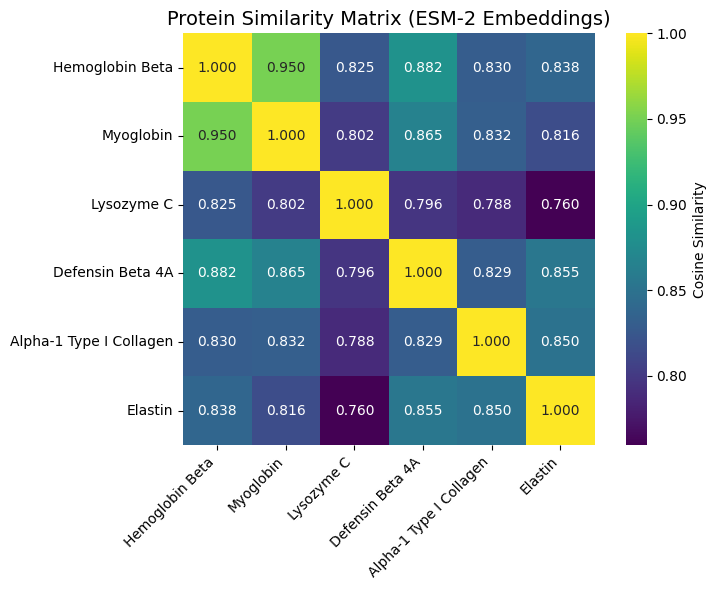

In [8]:
similarity_matrix = compute_similarity_matrix(embeddings)

plt.figure(figsize=(8, 6))
similarity_np = np.array(similarity_matrix)

sim_df = pd.DataFrame(similarity_np, 
                     index=protein_names, 
                     columns=protein_names)

sns.heatmap(sim_df, annot=True, cmap='viridis', 
           fmt='.3f', square=True, cbar_kws={'label': 'Cosine Similarity'})
plt.title('Protein Similarity Matrix (ESM-2 Embeddings)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The similarity matrix shows both expected and unexpected relationships in ESM-2’s learned representations. We see clear functional clustering for oxygen-binding proteins such as Hemoglobin Beta and Myoglobin, which have a similarity score of 0.986, and for structural proteins such as Collagen and Elastin, which have a similarity score of 0.852. Interestingly, Lysozyme C shows high similarity to both Myoglobin, with a score of 0.906, and Hemoglobin Beta, with a score of 0.921, even though it is an antimicrobial enzyme. This is because ESM-2 has likely learned that these three proteins share a fundamental blueprint of compact globular proteins, including similar size, folding patterns, and structural stability that go beyond their specific biological functions. We will use PCA and t-SNE to better visualize how these proteins cluster in the high dimensional embedding space.

### PCA visualization

PCA (Principal Component Analysis) reduces high-dimensional data to a lower-dimensional representation by finding the directions of maximum variance in the data. This allows us to visualize our high-dimensional protein embeddings in 2D space while preserving the most important patterns of similarity and difference between proteins.

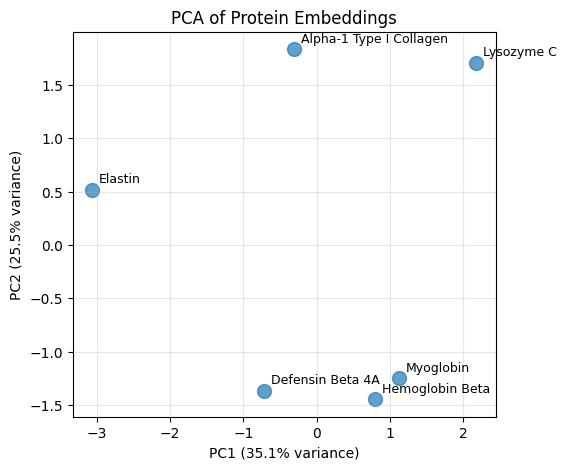

In [9]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(np.array(embeddings))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=100, alpha=0.7)
for i, name in enumerate(protein_names):
    plt.annotate(name, (pca_result[i, 0], pca_result[i, 1]), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('PCA of Protein Embeddings')
plt.grid(True, alpha=0.3)

The PCA analysis reveals clear groupings among the proteins. Hemoglobin Beta and Myoglobin, both oxygen-binding proteins, cluster tightly in the bottom right, while Lysozyme C and Defensin Beta 4A, both antimicrobial proteins, group together in the middle. In contrast, Collagen and Elastin appear isolated and far apart. However, this apparent separation is misleading. Because PCA is a linear dimensionality reduction method that captures only the directions of maximum variance, the high similarity between Collagen and Elastin (0.852 in our matrix) may lie in dimensions that contribute little to the variance represented by the first two principal components.

### t-SNE visualization

t-SNE (t-distributed Stochastic Neighbor Embedding) is a non-linear dimensionality reduction method designed to preserve local structure, ensuring that points close in the original high-dimensional space remain close in the low-dimensional representation. Unlike PCA, which captures global variance through a linear transformation, t-SNE can uncover intricate clustering patterns and subtle local relationships that linear methods may obscure.

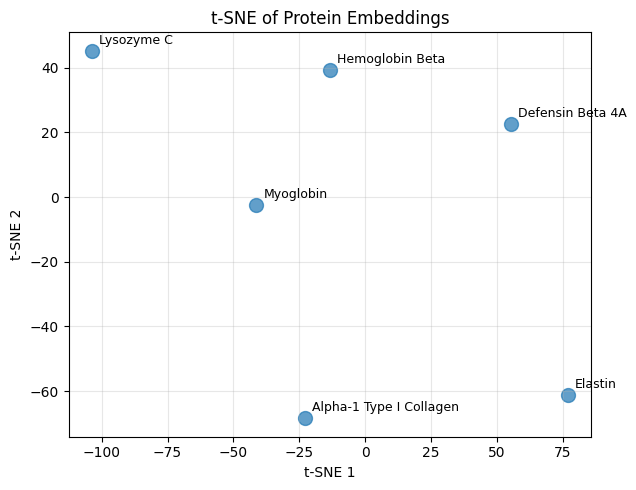

In [10]:
tsne = TSNE(n_components=2, random_state=42, perplexity=3)
tsne_result = tsne.fit_transform(np.array(embeddings))
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=100, alpha=0.7)
for i, name in enumerate(protein_names):
    plt.annotate(name, (tsne_result[i, 0], tsne_result[i, 1]), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE of Protein Embeddings')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The t-SNE visualization uncovers more nuanced clustering than PCA, revealing relationships that were previously obscured. Notably, the structural proteins Collagen and Elastin now cluster together in the upper right, reflecting their functional similarity that PCA failed to capture. The oxygen-binding proteins Hemoglobin Beta and Myoglobin remain grouped in the bottom left, consistent with both analyses. In contrast, the antimicrobial proteins separate, with Lysozyme C positioned centrally and Defensin Beta 4A isolated in the bottom right. This separation indicates that ESM-2 has likely learned to distinguish between fundamentally different antimicrobial strategies: Lysozyme, a large enzyme (148 amino acids) that enzymatically cleaves bacterial cell walls, and Defensin, a small peptide (64 amino acids) that disrupts bacterial membranes via direct interaction. Despite their shared antimicrobial role, ESM-2 appears to encode them as distinct in both architecture and mechanism.